In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df = df.rename(columns={'Serial No.': 'no', 'GRE Score': 'gre', 'TOEFL Score': 'toefl',
                      'University Rating': 'rating', 'SOP': 'sop', 'LOR ': 'lor',
                      'CGPA': 'gpa', 'Research': 'research', 'Chance of Admit ': 'chance'})


In [3]:
df.drop(['no'], axis=1, inplace=True)

In [4]:
var = df.columns.values.tolist()
y = df['chance']
x = [i for i in var if i != 'chance']
x = df[x]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [11]:
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=FutureWarning)

warnings.filterwarnings("ignore", category=DataConversionWarning)

scaler = MinMaxScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])


In [12]:
y_train = [1 if chance > 0.83 else 0 for chance in y_train]
y_test = [1 if chance > 0.83 else 0 for chance in y_test]

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [16]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, lr.predict(x_test))))
print('--------------------------------------')
print(classification_report(y_test, lr.predict(x_test)))


Logistic regression accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.90      0.90      0.90        20

    accuracy                           0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100



Random Forest Accuracy: 0.980
--------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.95      0.95      0.95        20

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100



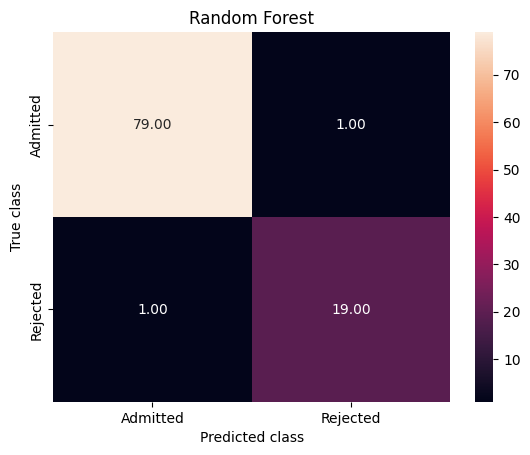

In [21]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(x_test))))
print('--------------------------------------')
print(classification_report(y_test, rf.predict(x_test)))
rf_confm = confusion_matrix(y_test, rf.predict(x_test))
sns.heatmap(rf_confm, annot=True, fmt='.2f', xticklabels=["Admitted", "Rejected"], yticklabels=["Admitted", "Rejected"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

Support vector machine accuracy: 0.970
--------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        80
           1       0.95      0.90      0.92        20

    accuracy                           0.97       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.97      0.97      0.97       100



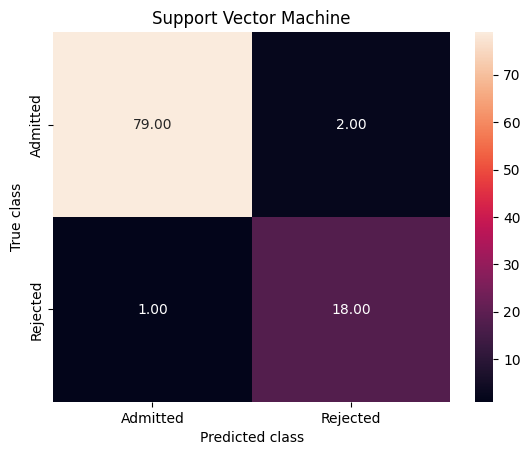

In [22]:
svc = SVC()
svc.fit(x_train, y_train)

print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))
print('--------------------------------------')
print(classification_report(y_test, svc.predict(x_test)))

svc_confm = confusion_matrix(svc.predict(x_test), y_test)
sns.heatmap(svc_confm, annot=True, fmt='.2f', xticklabels=["Admitted", "Rejected"], yticklabels=["Admitted", "Rejected"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.show()